Enter file from which to load data:  data/test_IDM_n_0/2022-05-04_75000__1.txt


1) omega_b
2) omega_dmeff
3) 100theta_s
4) ln10^{10}A_s
5) n_s
6) tau_reio
7) sigma_dmeff
8) A_cib_217
9) xi_sz_cib
10) A_sz
11) ps_A_100_100
12) ps_A_143_143
13) ps_A_143_217
14) ps_A_217_217
15) ksz_norm
16) gal545_A_100
17) gal545_A_143
18) gal545_A_143_217
19) gal545_A_217
20) galf_TE_A_100
21) galf_TE_A_100_143
22) galf_TE_A_100_217
23) galf_TE_A_143
24) galf_TE_A_143_217
25) galf_TE_A_217
26) calib_100T
27) calib_217T
28) A_planck
29) z_reio
30) Omega_Lambda
31) YHe
32) H0
33) A_s
34) sigma8
35) a
36) b


Enter the numbers associated with the parameters you'd like to plot separated by a space:  1 2 5 6 7 32 33 34


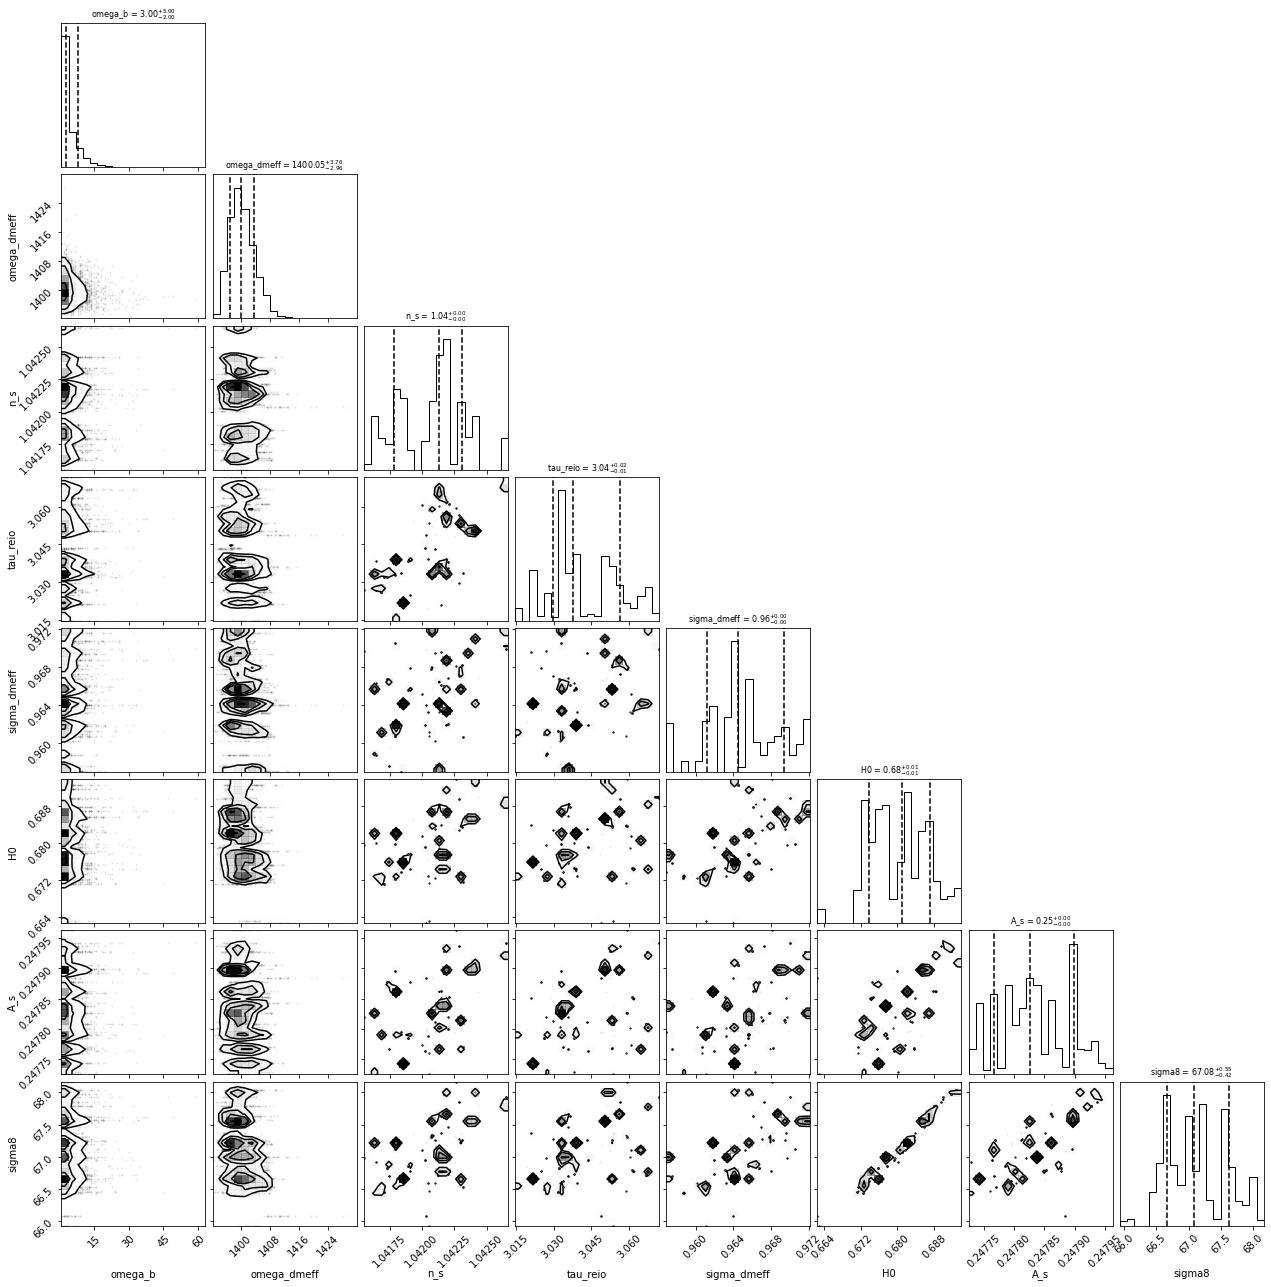

In [1]:
import re
import numpy as np
import corner
import matplotlib.pyplot as plt
import pandas as pd


def load_params(filename):
    paramsList = []
    with open(filename, 'r') as f:
        for line in f:
            line = line.strip()
            params = re.split(' \t ', line)
            paramsList.append(params)
    return paramsList


def choose_from_list(names_list):
    for i, idx in enumerate(names_list):
        print(str(i+1) + ") " + idx)
    choice = input("Enter the numbers associated with the parameters you'd like to plot separated by a space: ").split()
    cnames = [names_list[int(i)-1] for i in choice]
    return cnames


def load_data(filename, column_names):
    data = np.loadtxt(filename)
    df = pd.DataFrame(data, columns=column_names)
    return df


def plot_data(dataframe, columns):
    dfForPlot = dataframe[columns]
    figure = corner.corner(dfForPlot, labels=columns, quantiles=[0.16, 0.5, 0.84],
                           show_titles=True, title_kwargs={"fontsize": 8})
    return figure


def main():
    paramNames = load_params('data/test_IDM_n_0/2022-05-04_75000_.paramnames')
    # adding in dummy vars since the params list is 2 items short of the chains themselves
    paramNames.extend([['a', 'a'], ['b', 'b']])
    paramsList_0 = [item[0] for item in paramNames]
    # paramsList_1 = [item[1] for item in paramNames]
    rawChain = input("Enter file from which to load data: ")
    pmsForPlot = choose_from_list(paramsList_0)
    chainDF = load_data(rawChain, paramsList_0)
    plot_data(chainDF, pmsForPlot)
    plt.show()


main()